In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import hdbscan
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
from sklearn.metrics.cluster import contingency_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from ucimlrepo import fetch_ucirepo 
 
adult = fetch_ucirepo(id=2) 
X = adult.data.features 
y = adult.data.targets 

df = X.copy()
df['y'] = y
 
df=df.dropna()

df['target'] = df['y'].map({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1})
df = df.drop('y', axis=1)
df_num = df[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'target']]

def sample_from_group(group):
    return group.sample(min(len(group), 5000), random_state=42)

sampled_df = df_num.groupby('target', group_keys=False).apply(sample_from_group)
sampled_df.reset_index(drop=True, inplace=True)

scaler = MinMaxScaler()
df_num_scaled = scaler.fit_transform(sampled_df)
df_num = pd.DataFrame(df_num_scaled, columns=df_num.columns)

target_counts = df_num['target'].value_counts()
print(target_counts)

num_observations = df_num.shape[0]
print("Number of Observations:", num_observations)

0.0    5000
1.0    5000
Name: target, dtype: int64
Number of Observations: 10000


In [4]:
X = df_num.drop('target', axis=1)
y = df_num['target']

In [5]:
# K-Means for 9 cluster partitioning

kmeans = KMeans(n_clusters=9, random_state=42)
cluster_labels = kmeans.fit_predict(X)

cluster_dataframes = {}

# Creates a df for each cluster and store its data points
for cluster_label in range(9):
    cluster_indices = np.where(cluster_labels == cluster_label)[0]
    cluster_dataframes[f'cluster_{cluster_label}'] = X.iloc[cluster_indices].copy()

# Access the dataframes for each cluster using the dictionary keys
for cluster_label, cluster_df in cluster_dataframes.items():
    print(f"Cluster {cluster_label} size: {len(cluster_df)}")


Cluster cluster_0 size: 604
Cluster cluster_1 size: 2422
Cluster cluster_2 size: 1174
Cluster cluster_3 size: 2590
Cluster cluster_4 size: 625
Cluster cluster_5 size: 854
Cluster cluster_6 size: 115
Cluster cluster_7 size: 936
Cluster cluster_8 size: 680


C:\Users\katha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\katha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


In [6]:
y_array = y.values
print(type(y_array))

<class 'numpy.ndarray'>


<Figure size 3000x2500 with 0 Axes>

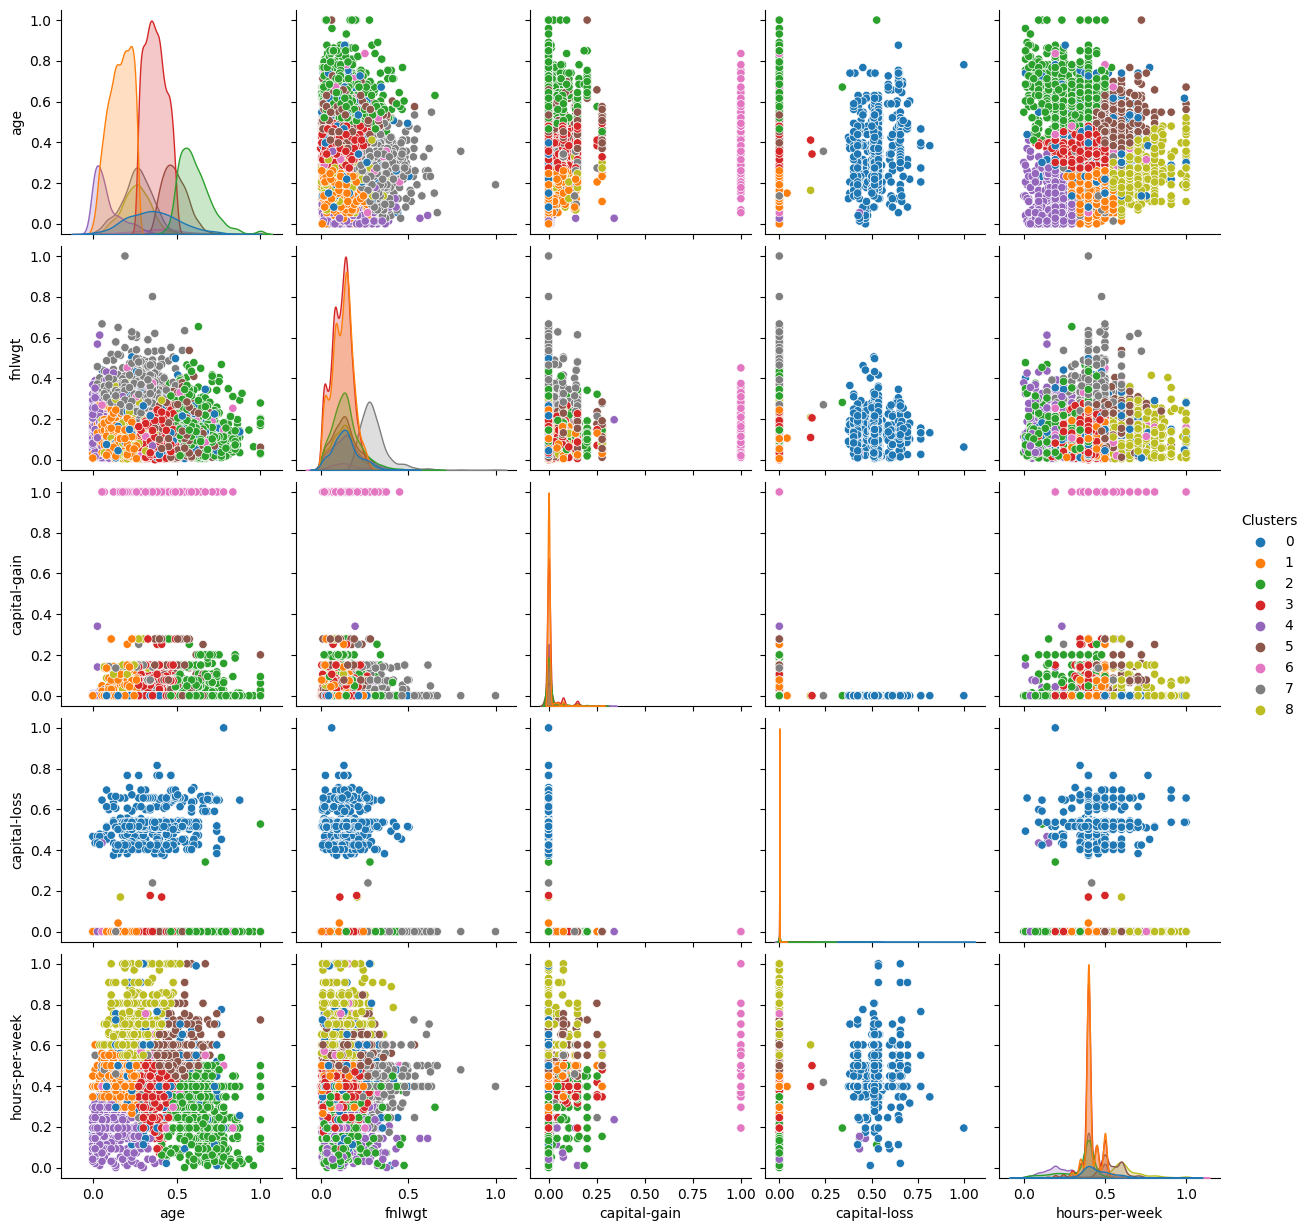

In [7]:
# Create a scatterplot matrix colored by cluster 

data = pd.concat([pd.DataFrame(X, columns=X.columns), pd.DataFrame(cluster_labels, columns=['Clusters'])], axis=1)
plt.figure(figsize=(30, 25))
g = sns.pairplot(data, hue='Clusters', palette='tab10')

plt.show()

<Figure size 800x600 with 0 Axes>

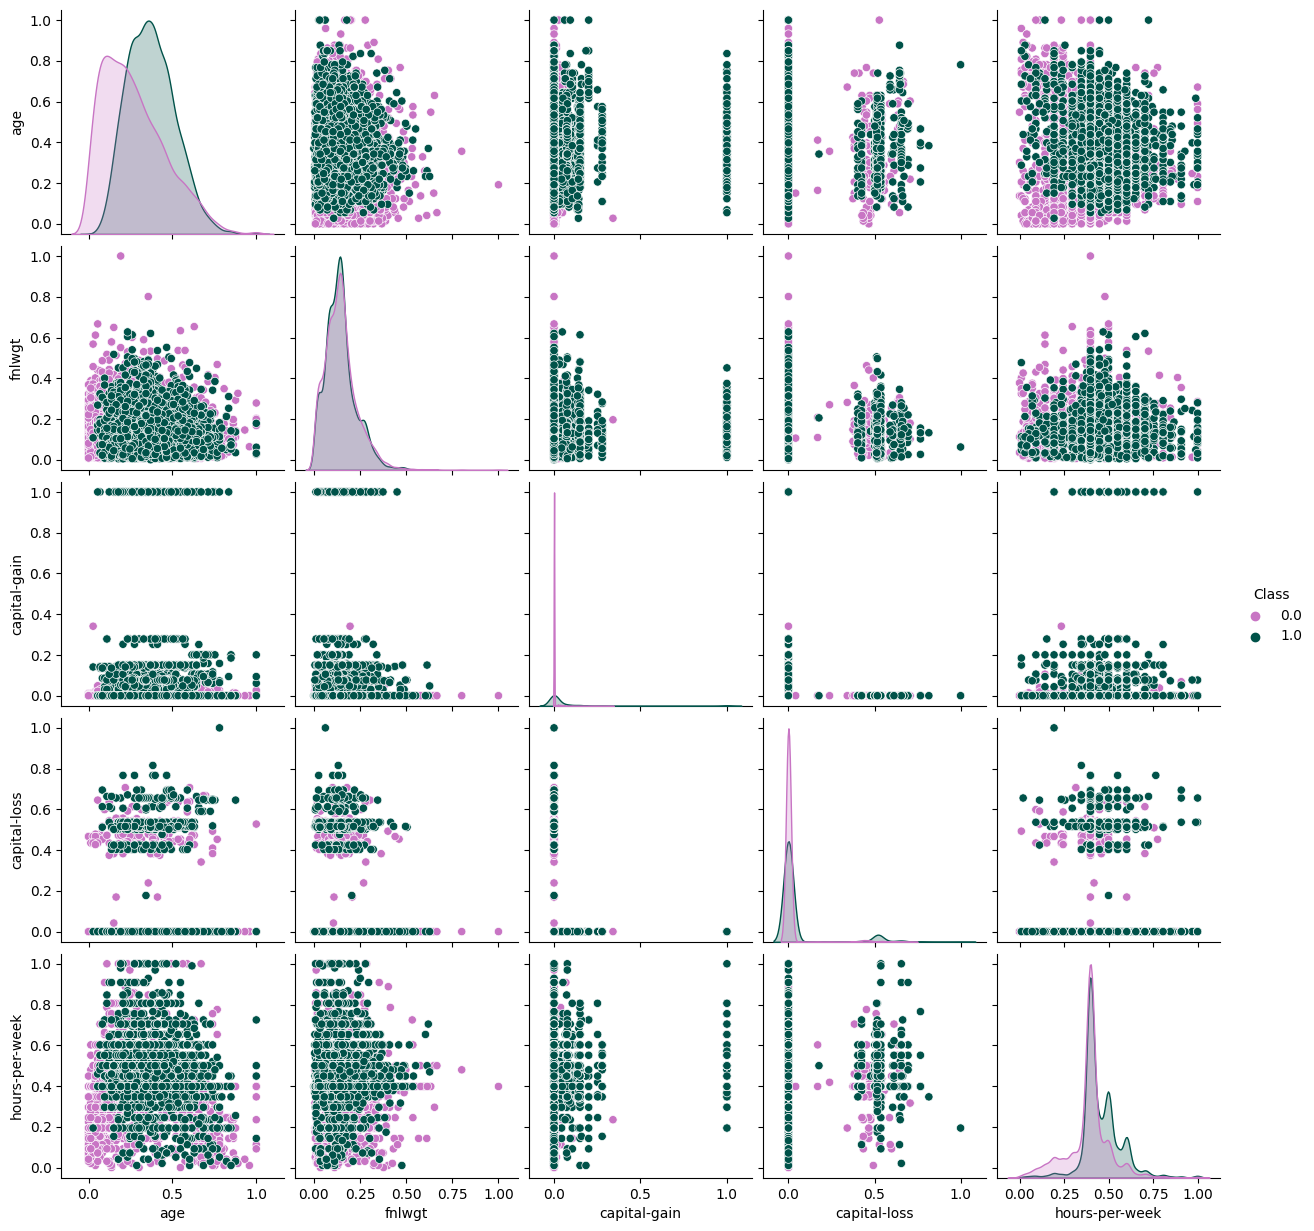

In [9]:
# pairwise scatterplot showing class

data = pd.concat([pd.DataFrame(X, columns=X.columns), pd.DataFrame(y_array, columns=['Class'])], axis=1)

plt.figure(figsize=(8, 6))
g = sns.pairplot(data, hue='Class', palette=['#c875c4', '#005249'])

plt.show()

# Other investigation of distribution

In [ ]:

data = pd.concat([pd.DataFrame(X, columns=X.columns), pd.DataFrame(cluster_labels, columns=['Clusters'])], axis=1)

plt.figure(figsize=(20, 15)) 
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='age', hue='Clusters', palette='tab10', kde=True, multiple='stack')
plt.title('Distribution of Age Across Clusters')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='capital-gain', hue='Clusters', palette='tab10', kde=True, multiple='stack')
plt.title('Distribution of Capital Gain Across Clusters')

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.concat([pd.DataFrame(X, columns=X.columns), pd.DataFrame(cluster_labels, columns=['Clusters'])], axis=1)

plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='age', hue='Clusters', palette='tab10', kde=True, multiple='stack')
plt.title('Distribution of Age Across Clusters')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='capital-gain', hue='Clusters', palette='tab10', kde=True, multiple='stack')
plt.title('Distribution of Capital Gain Across Clusters')

plt.show()

In [ ]:
plt.figure(figsize=(30, 20))
sns.histplot(data=data, x='capital-gain', hue='Clusters', palette='tab10', kde=True, multiple='stack')
plt.title('Distribution of Capital Gain Across Clusters')

plt.show()

In [ ]:
palette = ['grey' if cluster != 6 else 'red' for cluster in data['Clusters'].unique()]

plt.figure(figsize=(30, 20))
sns.histplot(data=data, x='capital-gain', hue='Clusters', palette=palette, kde=True, multiple='stack')
plt.title('Distribution of Capital Gain Across Clusters')

plt.show()